# **Perfil da Procuradoria de Justiça**

De acordo com a Lista de Antiguidade atualizada até 25 ago. 2020

Arquivo: 'Lista-I-Procurador.pdf' (Hash MD5: e03167529f3dc0319d4a172eb4ae559f)

Data em que o script foi rodado: 31 ago. 2020.

**José Eduardo de Souza Pimentel**

Código publicado em: https://github.com/jespimentel/ 
(sem as informações pessoais)

---

1) O colega Nico Maciel intuiu que, com o passar dos anos, vem aumentando o tempo de carreira para que o membro do MPSP ascenda à Procurador de Justiça e pediu-me que fizesse um código em Python que confirmasse ou não sua teoria.

2) O desafio técnico da proposta consistiu em extrair as informações de um documento que é, normalmente, publicado em PDF (a Lista de Antiguidade I - dos Procuradores de Justiça) e tratar os dados obtidos.

3) Optei pelo uso da biblioteca "Tabula Py" (no lugar de Camelot e Excalibur, que parecem ser mais eficientes na leitura de tabelas do PDF),em razão da facilidade da instalação. O programa rodou no Google Colab.

4) O "Tabula Py" cria tabelas individuais de cada página do PDF, que foram, em seguida, concatenadas com o Pandas para a geração do dataframe.

5) Por motivo desconhecido, o resultado da extração da página 4, embora exitoso, não correspondeu ao padrão das demais e recebeu tratamento específico.

In [ ]:
!pip install tabula-py

import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import tabula

In [ ]:
# Criação de um dataframe com a Lista 1 - Procuradores de Justiça

path = '/content/drive/My Drive/Datasets/Lista-I-Procurador.pdf'

df = tabula.read_pdf(path, pages='1-3') # O resultado da extração da página 4 é diferente do das anteriores e será tratado separadamente

Got stderr: Aug 31, 2020 1:15:29 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font CIDFont+F1 are not implemented in PDFBox and will be ignored
Aug 31, 2020 1:15:29 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font CIDFont+F2 are not implemented in PDFBox and will be ignored
Aug 31, 2020 1:15:31 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font CIDFont+F1 are not implemented in PDFBox and will be ignored
Aug 31, 2020 1:15:31 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font CIDFont+F2 are not implemented in PDFBox and will be ignored
Aug 31, 2020 1:15:32 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font CIDFont+F1 are not implemented in PDFBox and will be ignored
Aug 31, 2020 1:15:32 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenT

In [ ]:
df[0].head(5)

In [ ]:
df[0].drop([0,1], inplace=True)
df[0].head(5)

In [ ]:
df[1].head(5)

In [ ]:
df[1].drop([0,1], inplace=True)
df[1].head(5)

In [ ]:
df[2].head(5)

In [ ]:
df[2].drop([0,1], inplace=True)
df[2].head(5)

In [ ]:
proc_pag1_3 = pd.concat([df[0], df[1], df[2]], ignore_index=True)
proc_pag1_3.head(5)

In [ ]:
proc_pag1_3.dropna(axis=1, inplace=True)
proc_pag1_3.head(5)

In [ ]:
colunas = ['CLASS.', 'NOME', 'REGISTRO GERAL', 'DATA DE INCLUSÃO NA LISTA I', 'CARGO', 'SITUAÇÃO 2005', 'SITUAÇÃO ATUAL', 
           'TOTAL EM DIAS', 'CARREIRA', 'ENTRANCIA ANTERIOR', 'SERVIÇO PÚBLICO', 'NÚMERO DE FILHOS', 'DATA DO NASCIMENTO']
proc_pag1_3.columns = colunas
proc_pag1_3

In [ ]:
proc_pag1_3 = proc_pag1_3[['CLASS.', 'SITUAÇÃO ATUAL', 'TOTAL EM DIAS', 'CARREIRA', 'ENTRANCIA ANTERIOR',
                           'SERVIÇO PÚBLICO', 'NÚMERO DE FILHOS', 'DATA DO NASCIMENTO']]
proc_pag1_3.head(5)

In [ ]:
proc_pag1_3['INÍCIO NA CARREIRA'] = proc_pag1_3 ['CARREIRA'].apply(lambda x: x[0:10])
proc_pag1_3['INÍCIO ENTR ANT'] = proc_pag1_3 ['ENTRANCIA ANTERIOR'].apply(lambda x: x[0:10])
proc_pag1_3['INÍCIO EXERCÍCIO PROC'] = proc_pag1_3 ['SITUAÇÃO ATUAL'].apply(lambda x: x[-10:])

In [ ]:
proc_pag1_3

In [ ]:
df_4 = tabula.read_pdf(path, pages='4')
df_4[0].head(7)

In [ ]:
df_4[0].drop([0, 1, 2, 3, 4], inplace=True)

In [ ]:
df_4[0].dropna(axis=1, inplace=True)
proc_pag4 = df_4[0]
proc_pag4.head(5)

In [ ]:
colunas = ['CLASS.-NOME-RG-DATA_LISTA_I-CARGO', 'SITUAÇÃO 2005', 'ENTRANCIA ATUAL', 'INÍCIO DE EXERCÍCIO','TOTAL EM DIAS', 
           'CARREIRA: INÍCIO-DIAS', 'ENTRANCIA ANTERIOR - INÍCIO-DIAS', 'SERVIÇO PÚBLICO', 'NÚMERO DE FILHOS', 'DATA DO NASCIMENTO']
proc_pag4.columns = colunas
proc_pag4.head(5)

In [ ]:
proc_pag4['CLASS.'] = proc_pag4['CLASS.-NOME-RG-DATA_LISTA_I-CARGO'].apply(lambda x: x[0:3])
proc_pag4['INÍCIO NA CARREIRA'] = proc_pag4['CARREIRA: INÍCIO-DIAS'].apply(lambda x: x[0:10])
proc_pag4['INÍCIO ENTR ANT'] = proc_pag4['ENTRANCIA ANTERIOR - INÍCIO-DIAS'].apply(lambda x: x[0:10])
proc_pag4['INÍCIO EXERCÍCIO PROC'] = proc_pag4['INÍCIO DE EXERCÍCIO'].apply(lambda x: x)

In [ ]:
colunas_relev = ['CLASS.', 'DATA DO NASCIMENTO', 'INÍCIO NA CARREIRA', 'INÍCIO ENTR ANT', 
                 'INÍCIO EXERCÍCIO PROC', 'SERVIÇO PÚBLICO','NÚMERO DE FILHOS']
proc_pag1_3 = proc_pag1_3[colunas_relev]
proc_pag4 = proc_pag4[colunas_relev]

In [ ]:
proc_lista = pd.concat([proc_pag1_3, proc_pag4], ignore_index=True)
proc_lista

In [ ]:
proc_lista.columns

Index(['CLASS.', 'DATA DO NASCIMENTO', 'INÍCIO NA CARREIRA', 'INÍCIO ENTR ANT',
       'INÍCIO EXERCÍCIO PROC', 'SERVIÇO PÚBLICO', 'NÚMERO DE FILHOS'],
      dtype='object')

In [ ]:
proc_lista[['DATA DO NASCIMENTO', 'INÍCIO NA CARREIRA', 'INÍCIO ENTR ANT','INÍCIO EXERCÍCIO PROC']] = proc_lista[['DATA DO NASCIMENTO', 'INÍCIO NA CARREIRA', 'INÍCIO ENTR ANT','INÍCIO EXERCÍCIO PROC']].astype('datetime64')

In [ ]:
proc_lista['Idade de ingresso no MP'] = (proc_lista['INÍCIO NA CARREIRA'] - proc_lista['DATA DO NASCIMENTO'])/ np.timedelta64(1, 'Y')
proc_lista['Idade de ing. entrância anterior'] = (proc_lista['INÍCIO ENTR ANT'] - proc_lista['DATA DO NASCIMENTO'])/ np.timedelta64(1, 'Y')
proc_lista['Idade de qdo foi promovido a Procurador'] = (proc_lista['INÍCIO EXERCÍCIO PROC'] - proc_lista['DATA DO NASCIMENTO'])/ np.timedelta64(1, 'Y')
proc_lista['Tempo de carreira qdo da prom. a Procurador'] = (proc_lista['INÍCIO EXERCÍCIO PROC'] - proc_lista['INÍCIO NA CARREIRA'])/ np.timedelta64(1, 'Y')
proc_lista['Tempo de carreira total'] = (datetime.now () - proc_lista['INÍCIO NA CARREIRA'])/ np.timedelta64(1, 'Y')
proc_lista['Tempo como Procurador'] = (datetime.now ()- proc_lista['INÍCIO EXERCÍCIO PROC'])/ np.timedelta64(1, 'Y')
proc_lista['Porcentagem de tempo como procurador (em relação ao tempo de carreira'] = proc_lista['Tempo como Procurador']/proc_lista['Tempo de carreira total']*100
proc_lista['Idade atual'] = (datetime.now ()- proc_lista['DATA DO NASCIMENTO'])/ np.timedelta64(1, 'Y')

In [ ]:
proc_lista.set_index('CLASS.', inplace=True)
proc_lista

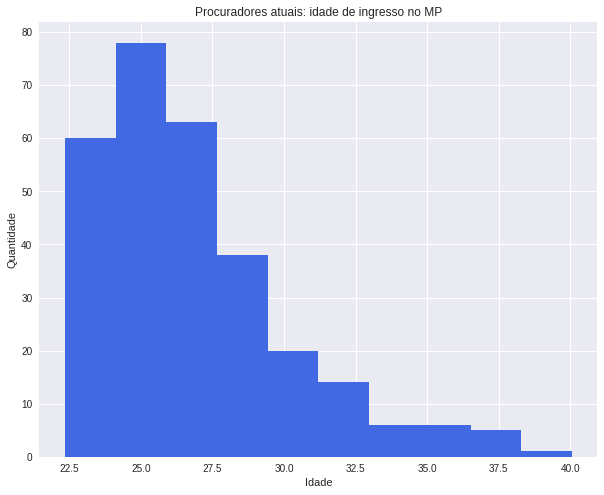

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
plt.hist((proc_lista['Idade de ingresso no MP']), color = 'royalblue')
plt.title('Procuradores atuais: idade de ingresso no MP')
plt.grid(True)
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.savefig('/content/drive/My Drive/tmp/01_idade_ingresso_mp.png')
plt.show()
plt.close()

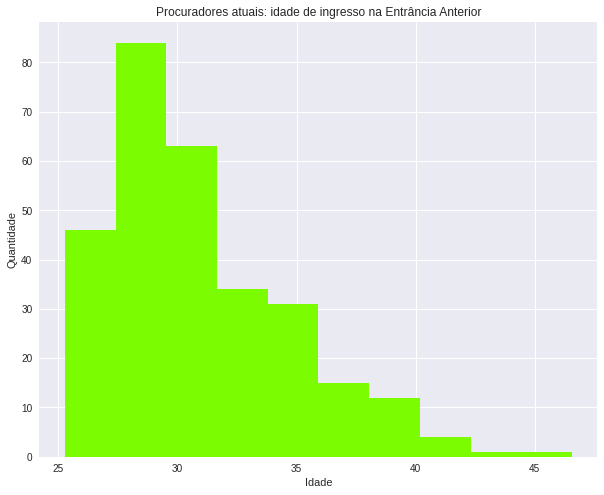

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
plt.hist((proc_lista['Idade de ing. entrância anterior']), color = 'lawngreen')
plt.title('Procuradores atuais: idade de ingresso na Entrância Anterior')
plt.grid(True)
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.savefig('/content/drive/My Drive/tmp/02_idade_entr_ant.png')
plt.show()
plt.close()

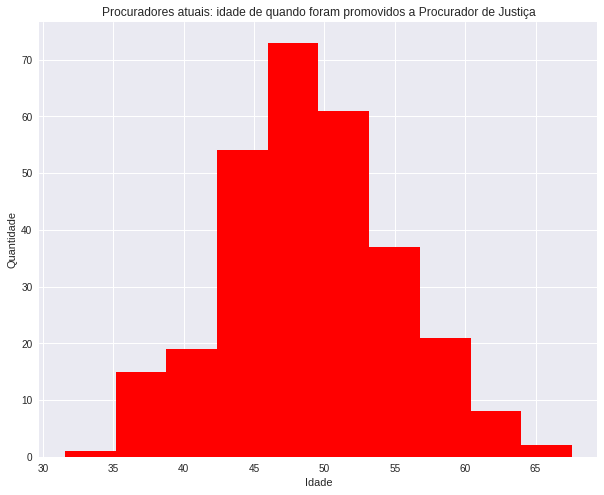

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
plt.hist((proc_lista['Idade de qdo foi promovido a Procurador']), color = 'red')
plt.grid(True)
plt.title('Procuradores atuais: idade de quando foram promovidos a Procurador de Justiça')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.savefig('/content/drive/My Drive/tmp/03_idade_inicio_procurador.png')
plt.show()
plt.close()

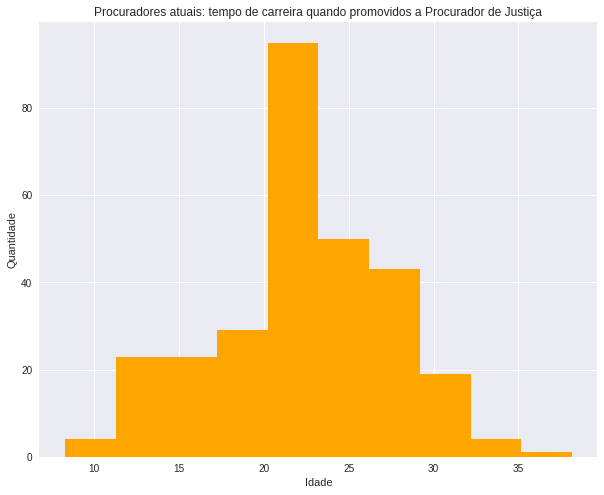

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
plt.hist((proc_lista['Tempo de carreira qdo da prom. a Procurador']), color = 'orange')
plt.grid(True)
plt.title('Procuradores atuais: tempo de carreira quando promovidos a Procurador de Justiça')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.savefig('/content/drive/My Drive/tmp/04_tempo_carreira_prom_procurador.png')
plt.show()
plt.close()

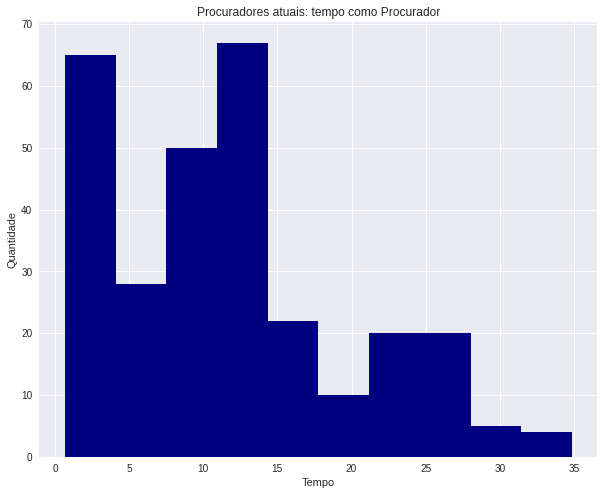

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
plt.hist((proc_lista['Tempo como Procurador']), color = 'navy')
plt.grid(True)
plt.title('Procuradores atuais: tempo como Procurador')
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.savefig('/content/drive/My Drive/tmp/05_tempo_como_procurador.png')
plt.show()
plt.close()

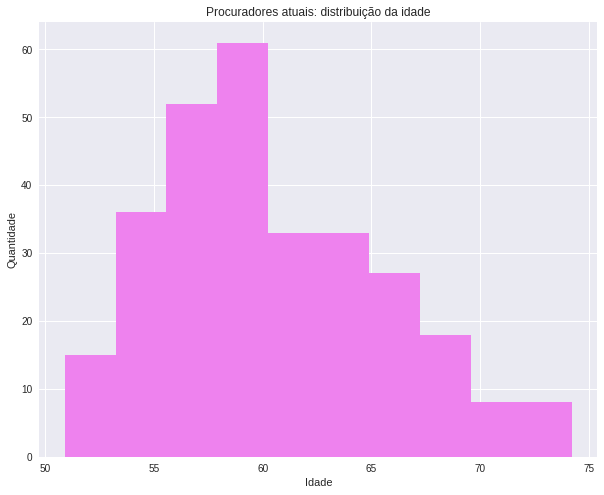

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
plt.hist((proc_lista['Idade atual']), color = 'violet')
plt.grid(True)
plt.title('Procuradores atuais: distribuição da idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.savefig('/content/drive/My Drive/tmp/06_idade_atual.png')
plt.show()
plt.close()

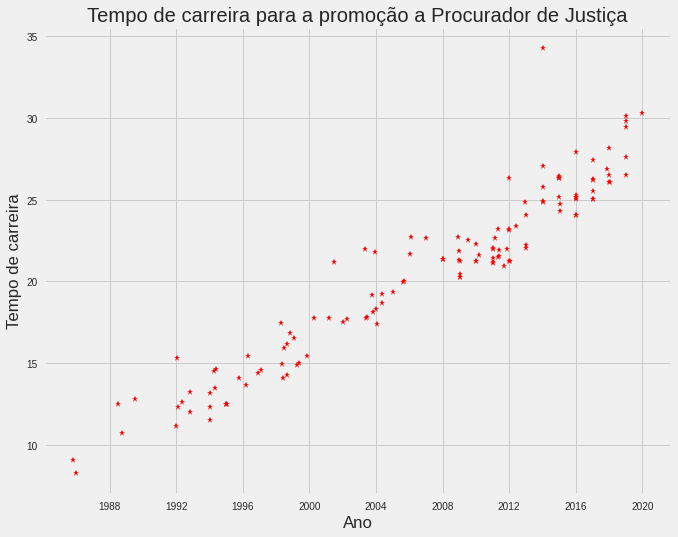

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
plt.plot((proc_lista.groupby('INÍCIO EXERCÍCIO PROC')['Tempo de carreira qdo da prom. a Procurador'].mean()), '*r')
plt.grid(True)
plt.title('Tempo de carreira para a promoção a Procurador de Justiça')
plt.xlabel('Ano')
plt.ylabel('Tempo de carreira')
plt.savefig('/content/drive/My Drive/tmp/07_tempo_de_carreira_promocao.png')
plt.show()
plt.close()

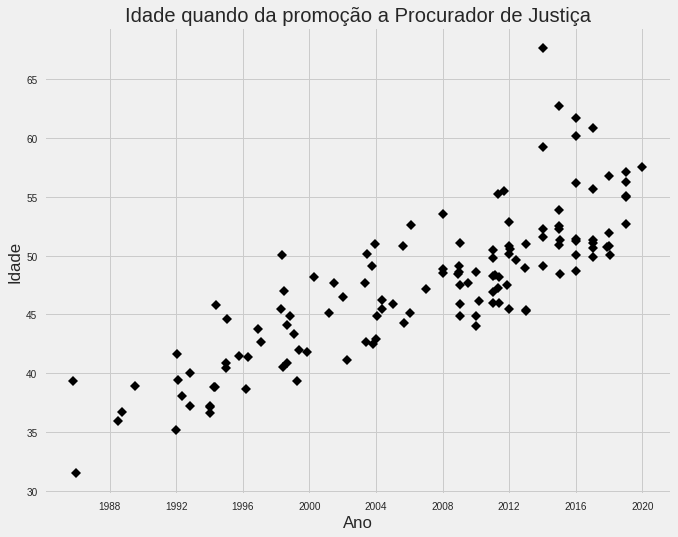

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
plt.plot((proc_lista.groupby('INÍCIO EXERCÍCIO PROC')['Idade de qdo foi promovido a Procurador'].mean()), 'Dk')
plt.grid(True)
plt.title('Idade quando da promoção a Procurador de Justiça')
plt.xlabel('Ano')
plt.ylabel('Idade')
plt.savefig('/content/drive/My Drive/tmp/08_idade_quando_da_promocao.png')
plt.show()
plt.close()

In [ ]:
proc_lista['SERVIÇO PÚBLICO'] = pd.to_numeric (proc_lista['SERVIÇO PÚBLICO'], errors='coerce')
proc_lista['NÚMERO DE FILHOS'] = pd.to_numeric (proc_lista['NÚMERO DE FILHOS'], errors='coerce')
proc_lista.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 1 to 291
Data columns (total 14 columns):
 #   Column                                                                 Non-Null Count  Dtype         
---  ------                                                                 --------------  -----         
 0   DATA DO NASCIMENTO                                                     291 non-null    datetime64[ns]
 1   INÍCIO NA CARREIRA                                                     291 non-null    datetime64[ns]
 2   INÍCIO ENTR ANT                                                        291 non-null    datetime64[ns]
 3   INÍCIO EXERCÍCIO PROC                                                  291 non-null    datetime64[ns]
 4   SERVIÇO PÚBLICO                                                        160 non-null    float64       
 5   NÚMERO DE FILHOS                                                       241 non-null    float64       
 6   Idade de ingresso no MP                

In [ ]:
proc_lista.describe()

,SERVIÇO PÚBLICO,NÚMERO DE FILHOS,Idade de ingresso no MP,Idade de ing. entrância anterior,Idade de qdo foi promovido a Procurador,Tempo de carreira qdo da prom. a Procurador,Tempo de carreira total,Tempo como Procurador,Porcentagem de tempo como procurador (em relação ao tempo de carreira,Idade atual
count,160.000000,241.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,244.571487,2.087137,26.854370,30.919250,48.987949,22.133579,33.595321,11.461742,32.344631,60.449692
std,287.140342,0.793647,3.279844,3.834983,6.014208,5.197687,3.839592,8.062046,19.671929,5.133712
min,1.026000,1.000000,22.341321,25.270882,31.565330,8.290382,27.695442,0.664086,2.082970,50.899204
25%,2.896250,2.000000,24.318090,27.973196,45.327419,19.979876,30.800229,5.147409,16.234215,56.640595
50%,106.500000,2.000000,26.007379,30.043054,48.726531,22.034676,32.568917,11.637618,33.376573,59.507184
75%,450.000000,2.000000,28.212763,32.882263,52.383006,26.040234,36.057010,16.330390,43.404333,64.436785
max,922.000000,6.000000,40.066531,46.566322,67.590710,38.158210,46.751275,34.874234,80.705452,74.234386


In [ ]:
proc_lista

In [ ]:
proc_lista.to_excel('/content/drive/My Drive/tmp/lista_procuradores.xlsx')